In [2]:
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


/Users/wangsili/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sensorweb.us'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


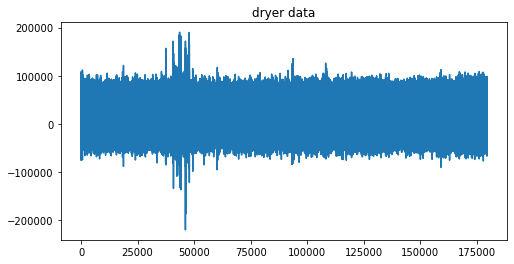

In [3]:
ip = "sensorweb.us" 
unit = "b8:27:eb:48:68:fa" # FloorB

#dryer data
stampIni = "2020-09-05T00:43:00.000Z" # UTC time = EST time + 4
stampEnd = "2020-09-05T01:13:00.000Z"

#stampIni = "2020-08-26T20:43:00.000Z" # UTC time = EST time + 4
#stampEnd = "2020-08-26T20:45:00.000Z"

client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
dryer_data = np.array(list(values))
if(len(dryer_data) == 0):
  print("No data in the chosen time range!")
  quit()


plt.figure(figsize=(8,4))
plt.title("dryer data")
plt.plot(dryer_data)
plt.show()



/Users/wangsili/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sensorweb.us'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


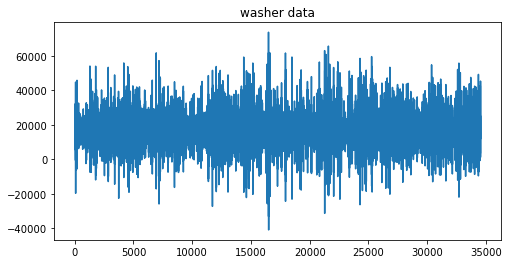

In [31]:
#dryer data
stampIni = "2020-09-04T23:57:00.000Z" # UTC time = EST time + 4
stampEnd = "2020-09-05T00:27:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
washer_data = np.array(list(values))
if(len(washer_data) == 0):
  print("No data in the chosen time range!")
  quit()


plt.figure(figsize=(8,4))
plt.title("washer data")
plt.plot(washer_data)
plt.show()

/Users/wangsili/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sensorweb.us'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


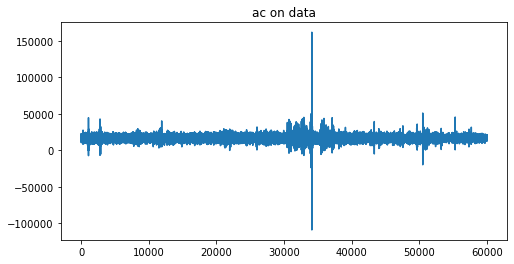

In [32]:
#dryer data
stampIni = "2020-09-04T23:33:00.000Z" # UTC time = EST time + 4
stampEnd = "2020-09-04T23:43:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
acon_data = np.array(list(values))
if(len(washer_data) == 0):
  print("No data in the chosen time range!")
  quit()


plt.figure(figsize=(8,4))
plt.title("ac on data")
plt.plot(acon_data)
plt.show()

/Users/wangsili/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sensorweb.us'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


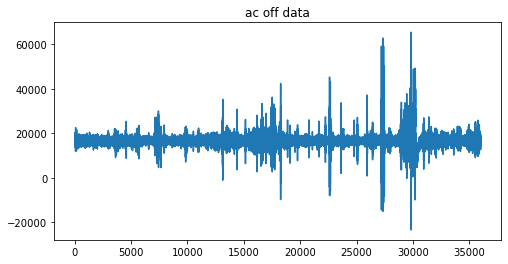

In [33]:
#ac off data
stampIni = "2020-09-04T23:44:00.000Z" # UTC time = EST time + 4
stampEnd = "2020-09-04T23:50:00.000Z"
client = InfluxDBClient(ip, "8086", "sili", "sensorweb", "floorseis",   True)
# Check FloorB at http://3.136.84.223:3000/d/3HdIpxGMz/s-house-dashboard-raw-data-only?orgId=1&from=1594149493945&to=1594149503005

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
acoff_data = np.array(list(values))
if(len(washer_data) == 0):
  print("No data in the chosen time range!")
  quit()


plt.figure(figsize=(8,4))
plt.title("ac off data")
plt.plot(acoff_data)
plt.show()

In [92]:
windowl = 100

datalist=[]
labellist=[]
for i in range(int(len(dryer_data)/100)):
    datalist.append([dryer_data[i*100:i*100 + windowl]])
    labellist.append(1)
for i in range(int(len(washer_data)/100)):
    datalist.append([washer_data[i*100:i*100 + windowl]])
    labellist.append(0)
for i in range(int(len(acon_data)/100)):
    datalist.append([acon_data[i*100:i*100 + windowl]])
    labellist.append(0)
for i in range(int(len(acoff_data)/100)):
    datalist.append([acoff_data[i*100:i*100 + windowl]])
    labellist.append(0)
    
datalist=np.array(datalist)
labellist=np.array(labellist)
print(datalist,labellist)

[[[ -2477. -11356.  53142. ...  -1248.  28163.  14411.]]

 [[ -7090.  44370.  51664. ...  38632.  25344. -17932.]]

 [[ 37255.  55723. -21048. ...  27056. -24919.  23328.]]

 ...

 [[ 19003.  15390.  13259. ...  17055.  16336.  16058.]]

 [[ 16436.  16228.  15125. ...  16555.  14557.  14345.]]

 [[ 16354.  18138.  17273. ...  19698.  19673.  15372.]]] [1 1 1 ... 0 0 0]


In [93]:
l = len(datalist)
train = datalist[0:l:3]
validation = datalist[1:l:3]
test = datalist[2:l:3]

train_target = labellist[0:l:3]

validation_target = labellist[1:l:3]

test_target = labellist[2:l:3]

print(train)
print(train_target)

[[[ -2477. -11356.  53142. ...  -1248.  28163.  14411.]]

 [[ 54406. -17474. -23442. ... -15274.  20605.  86059.]]

 [[ 67713.  91100.   3384. ...  58020. -28679.  -2417.]]

 ...

 [[ 20753.  18732.  14288. ...  16333.  14920.  16236.]]

 [[ 16455.  17562.  17655. ...  13451.  14520.  18187.]]

 [[ 16354.  18138.  17273. ...  19698.  19673.  15372.]]]
[1 1 1 ... 0 0 0]


In [1]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,windowl)))
model.add(Dense(1, activation='sigmoid'))



NameError: name 'Sequential' is not defined

In [95]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 365,825
Trainable params: 365,825
Non-trainable params: 0
_________________________________________________________________


In [96]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=False, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
1/9 [==>...........................] - ETA: 0s - loss: 0.9001 - accuracy: 0.4141
Epoch 00001: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 445ms/step - loss: 0.6712 - accuracy: 0.6132 - val_loss: 0.4140 - val_accuracy: 0.8848
Epoch 2/200
1/9 [==>...........................] - ETA: 0s - loss: 0.4105 - accuracy: 0.8672
Epoch 00002: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 354ms/step - loss: 0.3802 - accuracy: 0.8878 - val_loss: 0.3414 - val_accuracy: 0.9274
Epoch 3/200
1/9 [==>...........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.9219
Epoch 00003: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 346ms/step - loss: 0.3192 - accuracy: 0.9381 - val_loss: 0.2935 - val_accuracy: 0.9564
Epoch 4/200
1/9 [==>...........

INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 357ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9990
Epoch 27/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0288 - accuracy: 1.0000
Epoch 00027: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 494ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9990
Epoch 28/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000
Epoch 00028: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 359ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9990
Epoch 29/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0293 - accuracy: 1.0000
Epoch 00029: saving model to best_model.pkl
INFO:tensorflow:Assets writt

Epoch 52/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0142 - accuracy: 1.0000
Epoch 00052: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 342ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9990
Epoch 53/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 00053: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 344ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9990
Epoch 54/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 00054: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 474ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9990
Epoch 55/200
1/9 [==>.......

1/9 [==>...........................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 00077: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 345ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9990
Epoch 78/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 00078: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 340ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9990
Epoch 79/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 00079: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 341ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9990
Epoch 80/200
1/9 [==>....................

INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 339ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 103/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 00103: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 455ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 104/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000
Epoch 00104: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 342ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 105/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 00105: saving model to best_model.pkl
INFO:tensorflow:Assets wr

Epoch 128/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 00128: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 343ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 129/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00129: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 341ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 130/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00130: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 456ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 131/200
1/9 [==>...

1/9 [==>...........................] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00153: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 475ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 154/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 00154: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 344ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 155/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 00155: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 343ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 156/200
1/9 [==>.................

1/9 [==>...........................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00178: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 344ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 179/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 00179: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 3s 342ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 180/200
1/9 [==>...........................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 00180: saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
9/9 [==============================] - 4s 479ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 181/200
1/9 [==>.................

In [91]:
model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

test_preds = model.predict_classes(test)
print(test_preds,test_target)
#accuracy_score(test_target, test_preds)
precision_score(test_target, test_preds, pos_label=1)
#recall_score(test_target, test_preds, pos_label=1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]] [0 0 0 ... 0 0 0]


0.7307692307692307